# K-MEANS ALGORITHM

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

## Part 1

In [150]:
### SOME IMPORTS
import common as cm
import numpy as np
import matplotlib.pyplot as plt

1.1) Complete the following distance function

In [151]:
import math
# Computes a Euclidean distance between points A and B (these are vectors, i.e., A[0], A[1], ....)
def getEuclideanDistance(A, B):
    sumOfSquares = 0
    for i in range(len(A)):
        sumOfSquares +=(A[i]-B[i])**2
    return math.sqrt(sumOfSquares)
    
### TEST
print(getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

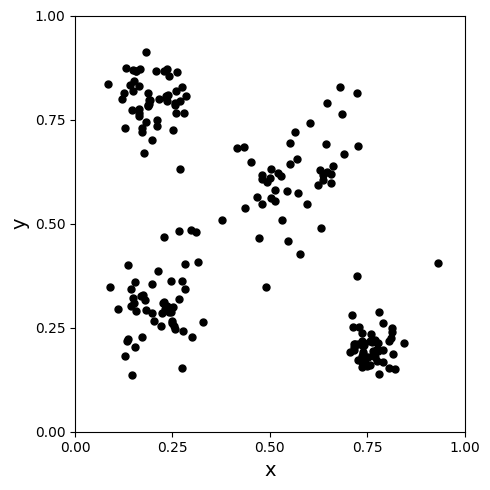

In [152]:
data = cm.getTestDataSet()
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

**How many different clusters (groups) do you see here?**

In [153]:
4

4

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

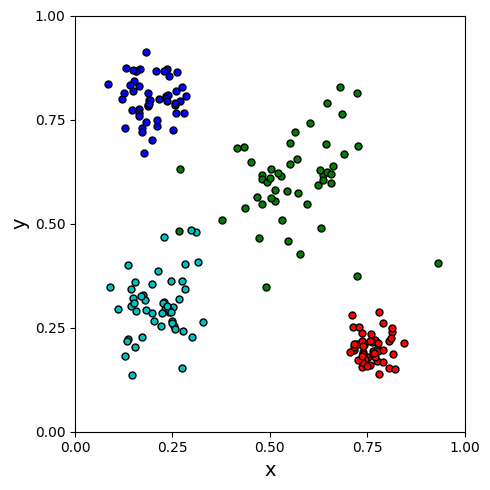

In [154]:
data = cm.getTestDataSet()
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [155]:
### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(K, data):
    rng = np.random.default_rng()
    centroids = rng.choice(data, K, False)
    return centroids

print(getCentroids(2, data))

[[0.27467786 0.82857998]
 [0.1483243  0.86790493]]


1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [156]:
def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):    
    NO_CHANGE = True
    if ASSIGNMENTS is None: NO_CHANGE = False
    #TODO
    
    ### CONSTRUCT NEW ASSIGNMENTS
    NEW_ASSIGNMENTS = [[] for k in range(K)]
    for i in range(len(DATA)):
        minDistacnce = math.inf
        assigment = 0
        for c in range(len(CENTROIDS)):
            distance = getEuclideanDistance(DATA[i], CENTROIDS[c])
            if minDistacnce > distance:
                minDistacnce = distance
                assigment = c
        NEW_ASSIGNMENTS[assigment].append(i)
    
    if ASSIGNMENTS is not None:
        NO_CHANGE  = sorted(ASSIGNMENTS) == sorted(NEW_ASSIGNMENTS)
        # NO_CHANGE  = np.array_equal(ASSIGNMENTS, NEW_ASSIGNMENTS)

    ### CONSTRUCT NEW CENTROIDS
    NEW_CENTROIDS = []
    for groupIndex in range(K):
        atributesSums = [0] * M
        for pointIndex in NEW_ASSIGNMENTS[groupIndex]:
            for a in range(M):
                atributesSums[a] += DATA[pointIndex][a]
        centroid = []
        for a in range(M):
            if (atributesSums[a]==0):
                centroid.append(0)
            else:
                centroid.append(atributesSums[a]/ len(NEW_ASSIGNMENTS[groupIndex]))
        NEW_CENTROIDS.append(centroid)

    
    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS 

1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

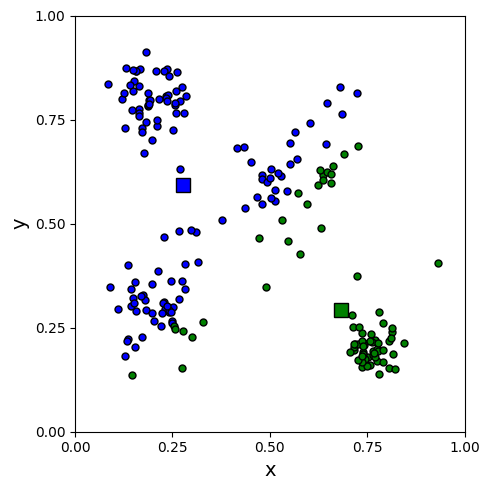

In [157]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

(Advanced*): make an animation showing the steps of the K-means algorithm. It is easier to do in jupyter notebook.
https://matplotlib.org/3.3.2/api/animation_api.html
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

Compleated after:  7  steps


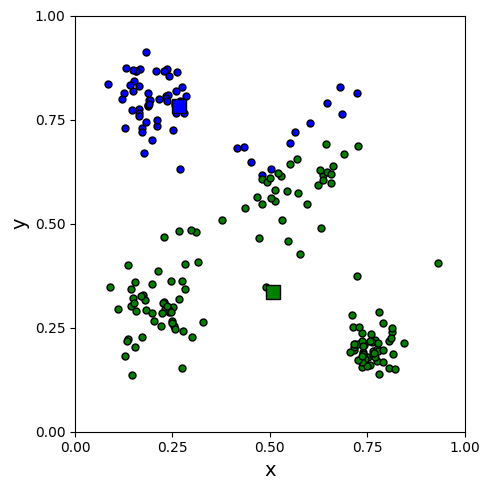

In [158]:
def doKMeans(DATA, CENTROIDS, K = 2, M = 2, display = True):
    ASSIGNMENTS = [[] for i in range(K)] 
    steps = 0 
    for i in range(100):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS.copy(), ASSIGNMENTS)
        steps = i+1
        if NO_CHANGE:
            break
    print('Compleated after: ', steps, ' steps') 
    return DATA, CENTROIDS, ASSIGNMENTS   

DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = 2)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.8) Run the below piece of code and observe the results. Which K seems to be the best choice?

Compleated after:  7  steps


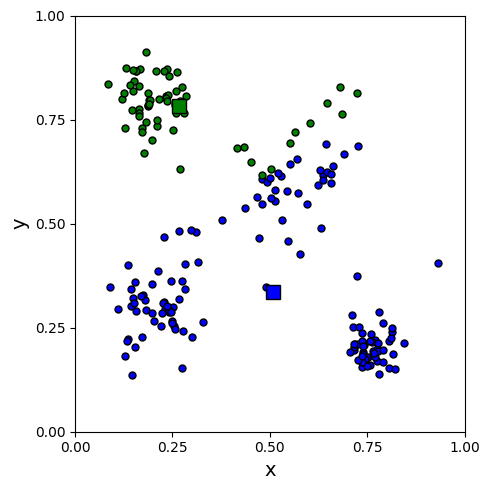

Compleated after:  10  steps


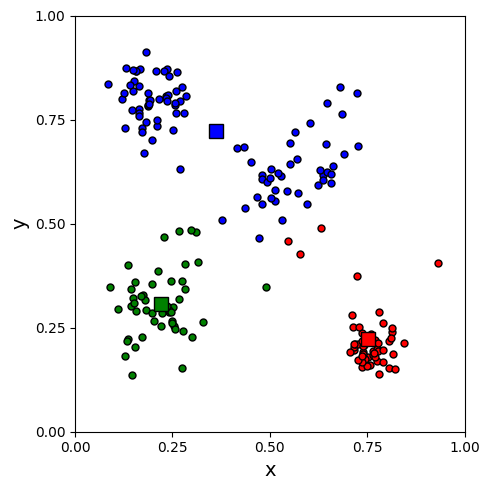

Compleated after:  5  steps


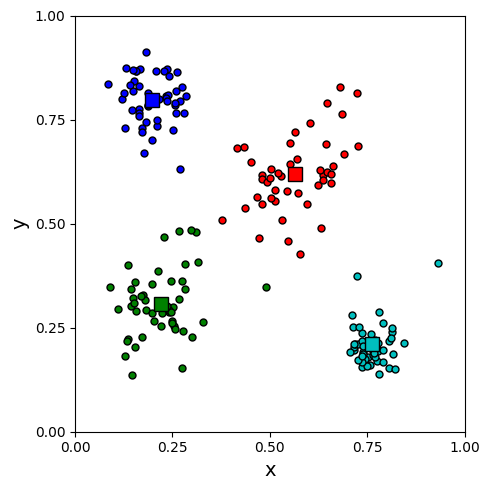

Compleated after:  12  steps


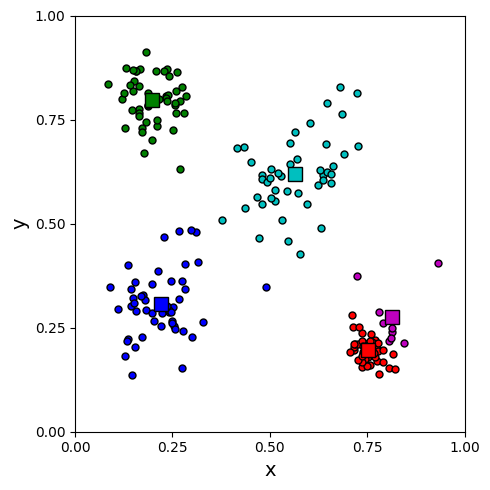

Compleated after:  6  steps


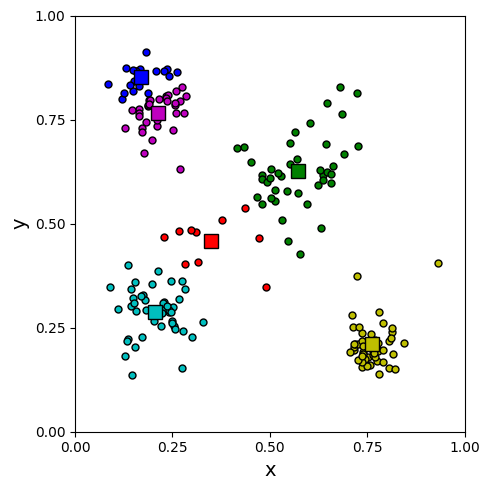

Compleated after:  11  steps


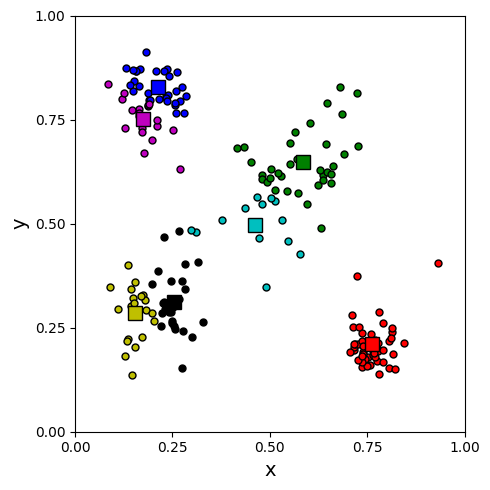

Compleated after:  8  steps


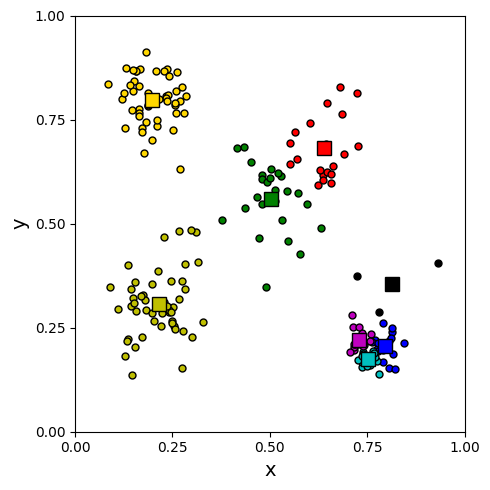

Compleated after:  9  steps


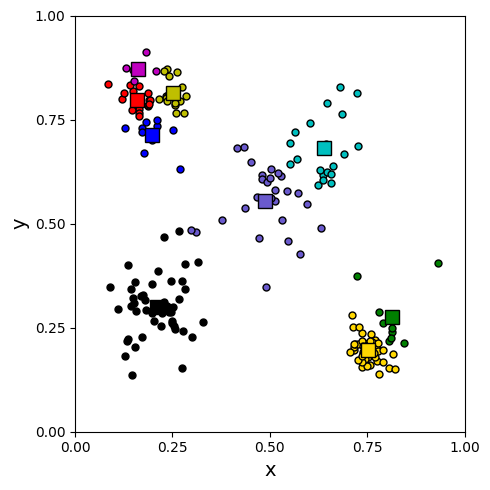

Compleated after:  9  steps


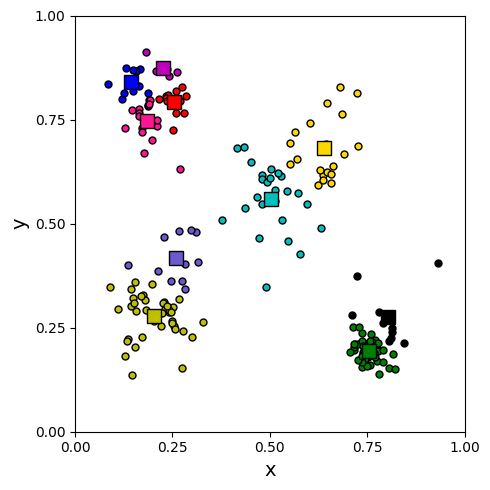

In [159]:
DATA = cm.getTestDataSet()
for k in range(2, 11):
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)
    cm.displayDataSet(plt, DATA, assignments = NEW_ASSIGNMENTS, centroids = NEW_CENTROIDS)

# k=4 is the best choice


## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **Find the "elbow"**.

In [160]:
def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    totalDistance = 0
    for clusterIndex in range(len(ASSIGNMENTS)):
        for pointIndex in ASSIGNMENTS[clusterIndex]:
            distance = getEuclideanDistance(DATA[pointIndex], CENTROIDS[clusterIndex])
            totalDistance+=distance

    return totalDistance

Compleated after:  3  steps
Compleated after:  9  steps
Compleated after:  9  steps
Compleated after:  10  steps
Compleated after:  12  steps
Compleated after:  9  steps
Compleated after:  3  steps
Compleated after:  4  steps
Compleated after:  9  steps


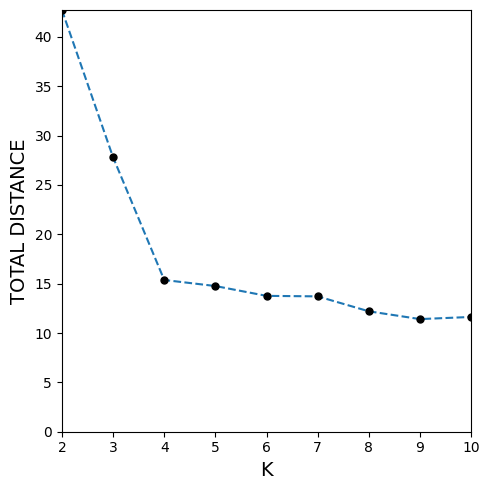

In [161]:
### PERFORM THE ANALYSIS HERE
DATA = cm.getTestDataSet()
distances = []
for k in range(2, 11):
    ASSIGNMENTS = [[] for i in range(k)] 
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS.copy(), k)
    totalDistance = getTotalDistance(DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS)
    distances.append([k, totalDistance])
cm.displayResults(plt, distances)
# best K: 4

# Part 3 - a small case study

In this exercise you are asked to use the K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Follow these steps:
1. Load the data. 
2. Check the min and max values for each attribute and consider normalization. 
3. Run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. 
4. Identify the best K using the performance indicator introduced in Part 2. 
5. For the best K - analyze constructed clusters. 
    * Compute basic stats (mean, max, min and standard deviation) attribute values within each cluster. You should use centroids constructed in the final iteration. 
    * (optional) Generate distribution plots. 
    * (optional) Calculate the internal consistency of clusters by calculating basic stats (mean, max, min and standard deviation) of distance between each pair of objects in each cluster and visualize this data.
    * (optional) Compute basic stats (mean, max, min and standard deviation) of distance between each pair of clusters and visualize this data.
    * You can print these values / show pandas DataFrame / visualize them with matplotlib boxplot (optional). 
    * Values should be presented in a non-normalized version.
6. Using the above, briefly describe each cluster.

In [162]:
DATA = cm.getCaseDataSet()

In [236]:
### CONSIDER NORMALIZATION HERE
minValues = [math.inf] *5
maxValues = [0]*5
for row in DATA:
    for i in range(5):
        if minValues[i] > row[i]:
            minValues[i] = row[i]
        if maxValues[i] < row[i]:
            maxValues[i] = row[i]

print('Min values: ', minValues)
print('Max values: ', maxValues)

DATA_N = []
for row in DATA:
    newRow = []
    for i in range(5):
        newRow.append((row[i]- minValues[i])/(maxValues[i]-minValues[i]))
    DATA_N.append(newRow)


Min values:  [15.012362258670485, 5.682015914647337, 12.913542297443495, 0.02237807600858785, 0.07828167791577645]
Max values:  [79.5991240593619, 6784.1019258316755, 99.881408211431, 59.98286275905256, 19.538265943140427]


In [ ]:

distances = []
for k in range(2, 11):
    ASSIGNMENTS = [[] for i in range(k)] 
    CENTROIDS = getCentroids(k, DATA_N)
    DATA_N, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA_N, CENTROIDS.copy(), k, 5, False)
    totalDistance = getTotalDistance(DATA_N, NEW_CENTROIDS, NEW_ASSIGNMENTS)
    distances.append([k, totalDistance])

Compleated after:  4  steps
Compleated after:  3  steps
Compleated after:  8  steps
Compleated after:  11  steps
Compleated after:  20  steps
Compleated after:  5  steps
Compleated after:  9  steps
Compleated after:  13  steps
Compleated after:  12  steps


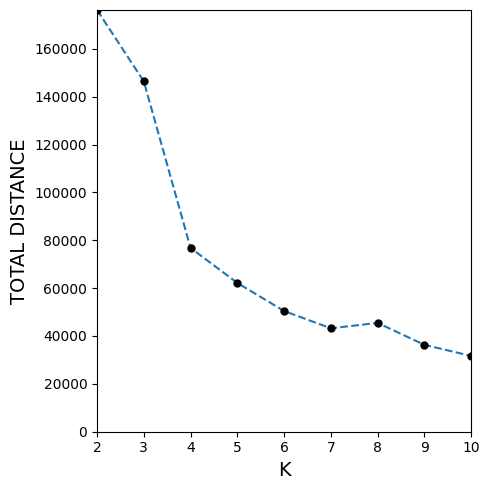

In [191]:
### DO THE ANALYSIS HERE (FIND ELBOW)
minValues = math.inf
maxValues = 0
    
cm.displayResults(plt, distances)

**Characterize the data in clusters generated by K-means run for suitably adjusted K**

In [235]:
### DISPLAY - SUMMARIZE - STATS FOR THE BEST K FOUND IN THE PREVIOUS STEP
import pandas as pd
K=4
CENTROIDS = getCentroids(K, DATA_N)
DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans(DATA_N, CENTROIDS.copy(), K, 5, False)
columns = ['Age', 'Salary', 'Health index', 'Work time', 'Activity time']
for clusterI in range(K):
    clusterData = [DATA[i] for i in ASSIGNMENTS[clusterI]]
    df = pd.DataFrame(clusterData)
    standardDeviation = df.std()
    minValue = df.min()
    maxValue = df.max()
    mean = df.mean()
    print('For cluster: ', clusterI+1, '\n')
    for column in range(5):
        print('For column: ', columns[column])
        print('Mean: ', mean[column])
        print('Max value: ', maxValue[column])
        print('Min value: ', minValue[column])
        print('Standard deviation: ', standardDeviation[column], '\n')
    
    

Compleated after:  6  steps
For cluster:  1 

For column:  Age
Mean:  72.13807923597055
Max value:  79.5991240593619
Min value:  64.89406127760394
Standard deviation:  3.297776372029706 

For column:  Salary
Mean:  1721.8119891332594
Max value:  2109.9571085533307
Min value:  1292.5636005783972
Standard deviation:  197.23771179016333 

For column:  Health index
Mean:  26.032394143622962
Max value:  37.04492310916373
Min value:  16.286129301814128
Standard deviation:  5.1391500514530986 

For column:  Work time
Mean:  3.732833873743083
Max value:  9.612156190801082
Min value:  0.44174061239315215
Standard deviation:  2.6643546252377623 

For column:  Activity time
Mean:  2.6580665868768962
Max value:  4.3456307057747035
Min value:  0.36909984234470183
Standard deviation:  1.0177129808308665 

For cluster:  2 

For column:  Age
Mean:  21.644690565030707
Max value:  36.853083616766504
Min value:  15.012362258670485
Standard deviation:  3.6096367704747476 

For column:  Salary
Mean:  827.3

In [ ]:
# cluster 1:
# Old pensioners with low income, health index and. 
# Very low work and sport activity time.

# cluster 2:
# Teens and young adults. Various salary from nearly no income to 2k.
# Various health index, from low to nearly maximum.
# Medium work time. High activity time.

# cluster 3:
# Old pensioners with low income, health index and. 
# Work and sport activity time near 0.

# cluster 4:
# Adults before retirement age.
# Best income from all groups. 
# Mosty good health with few exeptions.
# Highest work and activity time.